# 🍄 Mushroom Proportions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
mushrooms = pd.read_csv('../data/mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,Broad,Black,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


### Right away, you notice that all the data is textual. You will have to convert this data to be able to use it in a chart. Most of the data, in fact, is represented as an object:

In [2]:
print(mushrooms.select_dtypes(["object"]).columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


### Take this data and convert the 'class' column to a category:

In [3]:
cols = mushrooms.select_dtypes(['object']).columns
mushrooms[cols] = mushrooms[cols].astype('category')


In [4]:
edibleclass = mushrooms.groupby(['class']).count()
edibleclass

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
Edible,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,...,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
Poisonous,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,...,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916


### Pie

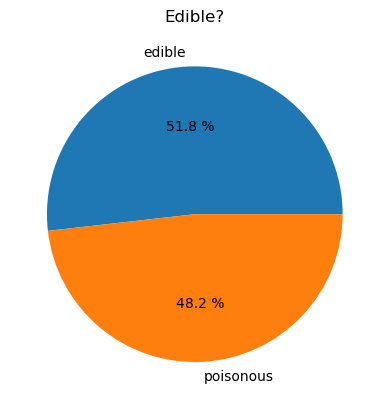

In [5]:
labels = ['edible', 'poisonous']
plt.pie(edibleclass['population'], labels=labels, autopct='%.1f %%')
plt.title('Edible?')
plt.show()

### Donuts

In [6]:
habitat = mushrooms.groupby(['habitat']).count()
habitat

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
habitat,,,,,,,,,,,,,,,,,,,,,
Grasses,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,...,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148
Leaves,832,832,832,832,832,832,832,832,832,832,...,832,832,832,832,832,832,832,832,832,832
Meadows,292,292,292,292,292,292,292,292,292,292,...,292,292,292,292,292,292,292,292,292,292
Paths,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,...,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144
Urban,368,368,368,368,368,368,368,368,368,368,...,368,368,368,368,368,368,368,368,368,368
Waste,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,192,192,192,192,192
Wood,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,...,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148


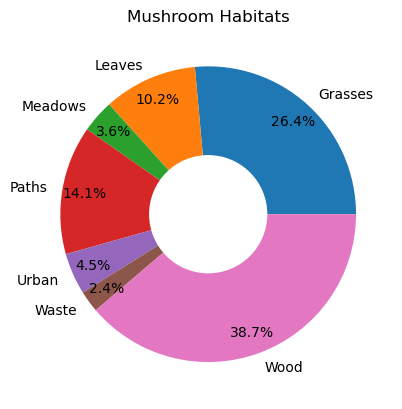

In [8]:
labels=['Grasses','Leaves','Meadows','Paths','Urban','Waste','Wood']

plt.pie(habitat['class'], labels=labels, autopct='%1.1f%%', pctdistance=0.85)
  
center_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)
  
plt.title('Mushroom Habitats')
  
plt.show()

### This code draws a chart and a center circle, then adds that center circle in the chart. Edit the width of the center circle by changing 0.40 to another value.

### Donut charts can be tweaked in several ways to change the labels. The labels in particular can be highlighted for readability. Learn more in the docs.

### Now that you know how to group your data and then display it as a pie or donut, you can explore other types of charts. Try a waffle chart, which is just a different way of exploring quantity.

### Waffles!

In [7]:
capcolor=mushrooms.groupby(['cap-color']).count()
capcolor

,class,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-color,,,,,,,,,,,,,,,,,,,,,
Brown,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,...,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284
Buff,168,168,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
Cinnamon,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
Green,1856,1856,1856,1856,1856,1856,1856,1856,1856,1856,...,1856,1856,1856,1856,1856,1856,1856,1856,1856,1856
Pink,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
Purple,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Red,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,...,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
White,1040,1040,1040,1040,1040,1040,1040,1040,1040,1040,...,1040,1040,1040,1040,1040,1040,1040,1040,1040,1040
Yellow,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,...,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
  
data ={'color': ['brown', 'buff', 'cinnamon', 'green', 'pink', 'purple', 'red', 'white', 'yellow'],
    'amount': capcolor['class']
     }
  
df = pd.DataFrame(data)
  
fig = plt.figure(
    FigureClass = Waffle,
    rows = 100,
    values = df.amount,
    labels = list(df.color),
    figsize = (30,30),
    colors=["brown", "tan", "maroon", "green", "pink", "purple", "red", "whitesmoke", "yellow"]
)